## Path Association 2024.9.3 ##

In [5]:
import cv2
import os
import shutil
import pandas as pd
import json
import numpy as np
import cv2
import math
import random
import sys

sys.path.append(r'../PeterPan/')

import YoloTools as yt

bb_test = [ [4,1],[7,6] ,1 ]
bb_gt = [ [1,4],[5,8] ,1 ]
print(yt.line_iou(bb_test,bb_gt))

bb_test = [ [6,1],[3,4] ,0 ]
bb_gt = [ [5,2],[2,8] ,0 ]
print(yt.line_iou(bb_test,bb_gt))

0.06896551724137931
0.17391304347826086


662
(138, 150)


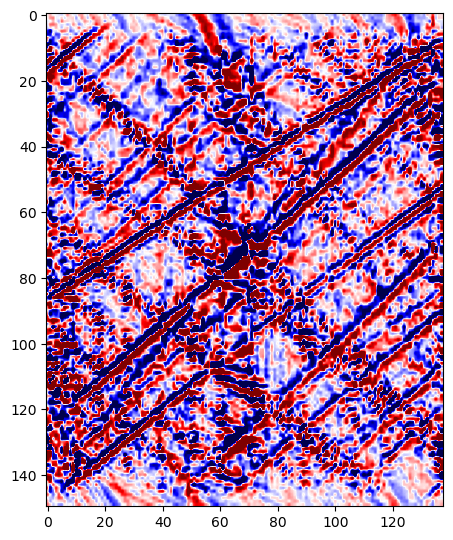

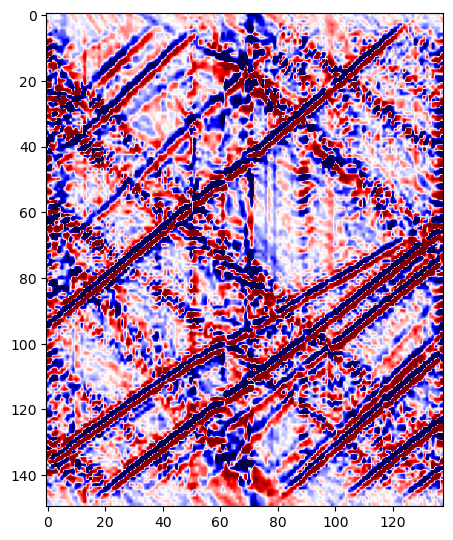

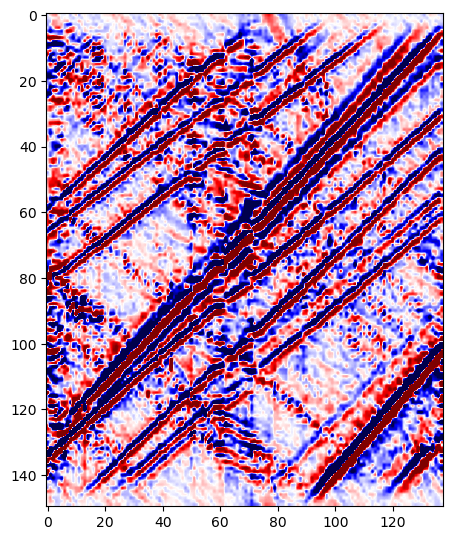

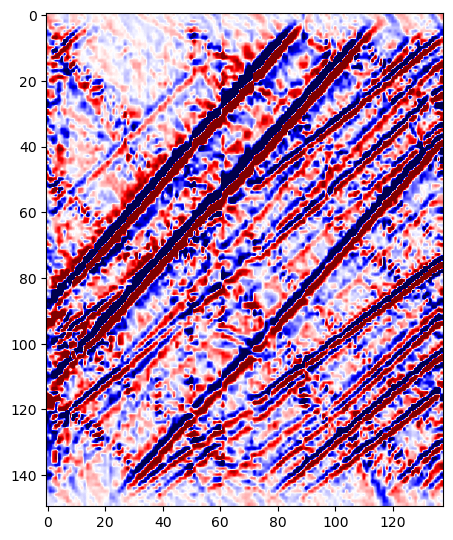

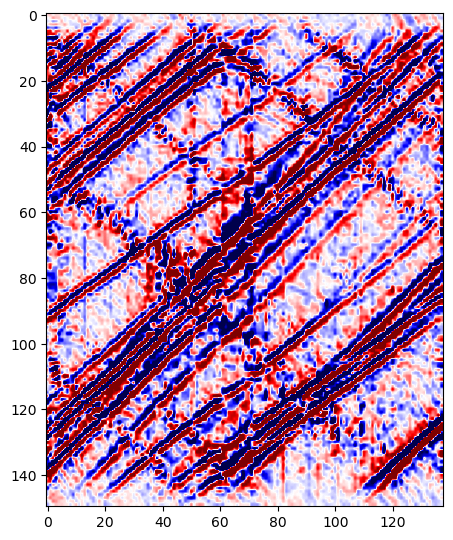

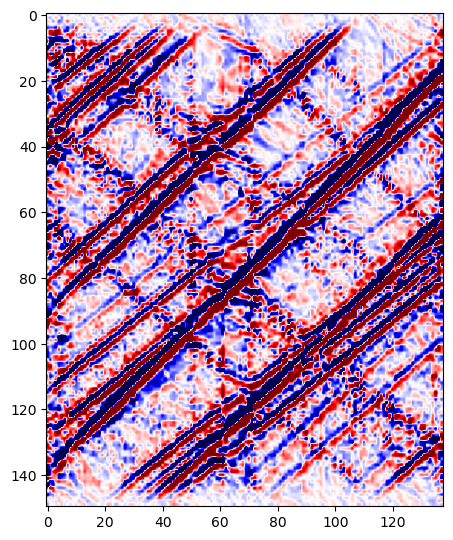

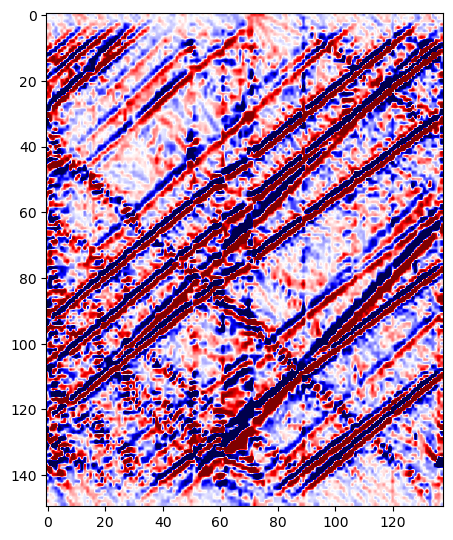

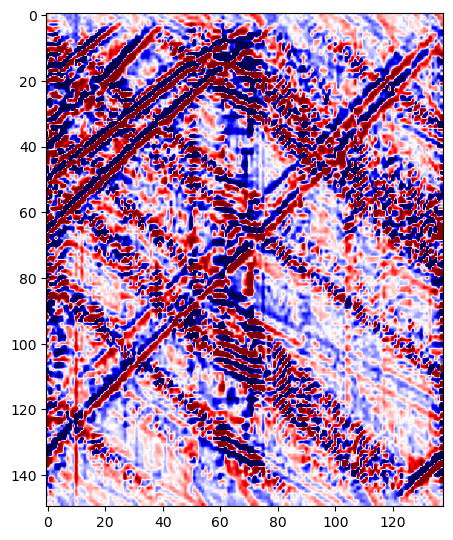

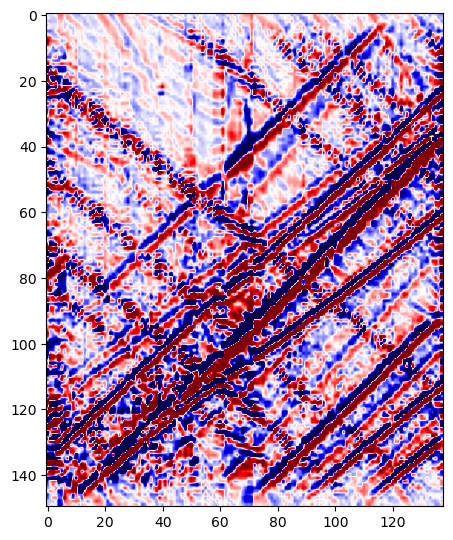

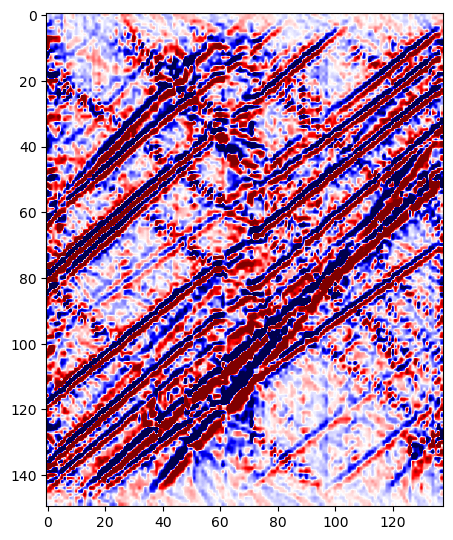

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import DasPrep as dp
import glob, os
import datetime
import h5py
from scipy.signal import decimate

mutation_stamp = [6, 182, 700, 722, 764, 788, 850, 1026, 1084, 1170, 1268, 1290, 1410, 1446, 1460, 1630, 1650, 1696, 1780, 1852, 1938, 2038, 2234,
                    2392, 2540, 2606, 2682, 2700, 2742, 3050, 3496, 3528, 3640, 3716, 3856, 3968]
fiber_cum_len = [i*4 for i in mutation_stamp]
dt = 1./500
dx = 4
M = np.array([10, 5])
Mdt = dt*np.prod(M)


npylist = glob.glob('../../Highway_2024_0510/output/0628_data2/deci_7_7/npy/*.npy')
print(len(npylist))
npylist.sort()

path = '../../Highway_2024_0510/output/0628_data2/deci_7_7/pic4/'
if not os.path.exists(path):
    os.makedirs(path)

num = 1
# for k in range(0,len(npylist)//num - 1):
for k in range(0, 10):

    data = np.concatenate([np.load(npylist[i]) for i in range(k*num,(k+1)*num)], axis=-1)
    data = dp.das_preprocess(data)
    dataEW = data[int(fiber_cum_len[21]/dx):int(fiber_cum_len[22]/dx), :]
    dataEW_d = np.delete(dataEW, np.r_[np.arange(51,60), np.arange(81,94), np.arange(160,196)], axis=0)
    # dataEW_d = np.delete(dataEW, np.r_[np.arange(51,60), np.arange(81,94), np.arange(160,165)], axis=0)

    data2 = dp.tapering(dataEW_d, 0.2)
    data2 = dp.lowpass(data2, Mdt,  fh=2)
    data2 = dp.das_preprocess(data2)
    data2 = decimate(data2, 2).astype('float')
    data2 = data2 / (data2).std(axis=1, keepdims=True)

    #fk transform
    fk = np.fft.fftshift(np.fft.fft2(data2))
    faxis = np.fft.fftshift(np.fft.fftfreq(data2.shape[1],dt*100))
    kaxis = np.fft.fftshift(np.fft.fftfreq(data2.shape[0],dt))
    # #fk plot
    # plt.figure(figsize=[8,6])
    # data_plot = np.log10(abs(fk[:, :]))
    # clim = data_plot.std() * 3.5
    # extent = [kaxis[0], kaxis[-1], faxis[0], faxis[-1]]
    # plt.imshow(data_plot.T, aspect='auto', cmap='jet', vmin=0, vmax=clim, 
    #         origin='lower', extent=extent)

    # print(fk.shape)
    # base  = 7000
    # plt.plot(kaxis, kaxis* 135/base, '--b')
    # plt.plot(kaxis, kaxis* 90/base, '--b')
    # plt.plot(kaxis, kaxis* 70/base, '--b')

    # plt.plot(kaxis, -kaxis* 135/base, '--b')
    # plt.plot(kaxis, -kaxis* 90/base, '--b')
    # plt.plot(kaxis, -kaxis* 70/base, '--b')

    # plt.xlabel('Wavenumber (1/m)')
    # plt.ylabel('Frequency (Hz)')

    # plt.xlim((kaxis[0], kaxis[-1]))
    # plt.ylim((faxis[0], faxis[-1]))

#get pos
    
    Vmat = faxis[None,:] / (kaxis[:,None]+1.e-10)
    fk_pos = np.copy(fk)
    # fk_pos[Vmat <= 0] = 0

    fk_pos[(Vmat <= -50/base) & (Vmat >= -150/base)] = 0
    data_V_pos = np.fft.ifft2(np.fft.ifftshift(fk_pos)).real


    Vmat = faxis[None,:] / (kaxis[:,None]+1.e-10)
    fk_neg = np.copy(fk)
    # fk_neg[Vmat >= 0] = 0

    fk_neg[(Vmat >= 50/base) & (Vmat <= 150/base)] = 0
    data_V_neg = np.fft.ifft2(np.fft.ifftshift(fk_neg)).real


    data_plot = data_V_pos[:, :]
    data_plot2 = data_V_neg[:, :]


    #plot
    # fig, ax = plt.subplots(1,2, figsize=[9,10])

    # data_plot = data_V_pos[:, :]
    # data_plot2 = data_V_neg[:, :]
    # # data_plot = data2 - data_V_pos[:, :]

    # xmin, xmax = 0, data_plot.shape[0]*dx
    # ymax, ymin = data_plot.shape[1]*dt*100, 0

    # clim = data_plot.std() * 3
    # ax[0].imshow(data_plot.T, aspect='auto', cmap='RdBu', vmin=-clim, vmax=clim,
    #             extent=[0, data_plot.shape[0]*dx, data_plot.shape[1]*dt*100, 0])

    # clim = data_plot2.std() * 3
    # ax[1].imshow(data_plot2.T, aspect='auto', cmap='RdBu', vmin=-clim, vmax=clim,
    #             extent=[0, data_plot.shape[0]*dx, data_plot.shape[1]*dt*100, 0])

    # ax[0].set_xlim([xmin, xmax])
    # ax[1].set_xlim([xmin, xmax])

    # ax[0].set_ylim([ymax, ymin])
    # ax[1].set_ylim([ymax, ymin])


    #plot
    plt.figure(figsize=[5.12,6.4])
    # plt.figure(figsize=[6.4,6.4]) 
    # plt.figure(figsize=[16,16]) 
    # data_plot = data2[:, :]
    clim = data_plot.std() * 1
    plt.imshow(data_plot.T, aspect='auto', cmap='seismic', vmin=-clim, vmax=clim)
    plt.savefig(path+str(k)+'pos.png' )

    #plot
    plt.figure(figsize=[5.12,6.4])
    # plt.figure(figsize=[6.4,6.4]) 
    # plt.figure(figsize=[16,16]) 
    # data_plot = data2[:, :]
    clim = data_plot.std() * 1
    plt.imshow(data_plot2.T, aspect='auto', cmap='seismic', vmin=-clim, vmax=clim)
    plt.savefig(path+str(k)+'neg.png' )
    # plt.show()
    plt.close()

print(data2.shape)
# 5Hz 约700m 30s*3

In [7]:
import sys
sys.path.append(r'../PeterPan/')
import eval_yolo_results2
import YoloTools as yt
import glob, os

# --------------可视化线段关联验证流程, 5个步骤依次运行-------------------
img_path = r'../../Highway_2024_0510/output/0628_data2/deci_7_7/pic/0.png' 
patch_dir =    r'../../Highway_2024_0510/output/0628_data2/deci_7_7/patches4'
yolo_predict = r'../../Highway_2024_0510/output/0628_data2/deci_7_7/yolo/labels'   # 每次预测完会存入新的文件夹，需修改“exp”对应的数字

img_flist = glob.glob('../../Highway_2024_0510/output/0628_data2/deci_7_7/pic4/*.png')
# 1.img to patch, 待验证图像划分patches保存
if not os.path.exists(patch_dir):
    os.makedirs(patch_dir)
for img_path in img_flist:
    pathc_num, img_h,img_w= eval_yolo_results2.img2patch_pad(img_path, patch_dir, patch_size=64, padding=16)


In [8]:
# 2. yolo predict, 用训练好的yolo模型预测上一步骤中的patches
# 命令：python detect.py --weights ./runs/train/exp7/weights/best.pt --source ../datasets/traffic/images/val --imgsz 192 --iou-thres 0.5 --conf-thres 0.5 --save-txt
# 命令：python ../../yolo5/detect.py --weights ./runs/train/exp7/weights/best.pt --source ../../Highway_2024_0510/output/0628_data2/deci_7_7/patches --project '../../Highway_2024_0510/output/0628_data2/' --name 'deci_7_7/yolo/' --imgsz 192 --iou-thres 0.5 --conf-thres 0.5 --save-txt
! python ../../Vehicle_Trace_DL/yolov5/detect.py --weights ../../Vehicle_Trace_DL/yolov5/runs/train/exp15/weights/best.pt --source ../../Highway_2024_0510/output/0628_data2/deci_7_7/patches4 --project '../../Highway_2024_0510/output/0628_data2/' --name 'deci_7_7/yolo/' --imgsz 192 --iou-thres 0.5 --conf-thres 0.5 --save-txt

detect: weights=['../../Vehicle_Trace_DL/yolov5/runs/train/exp15/weights/best.pt'], source=../../Highway_2024_0510/output/0628_data2/deci_7_7/patches4, data=../../Vehicle_Trace_DL/yolov5/data/coco128.yaml, imgsz=[192, 192], conf_thres=0.5, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../../Highway_2024_0510/output/0628_data2/, name=deci_7_7/yolo/, exist_ok=False, line_thickness=2, hide_labels=True, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-7-16 Python-3.11.5 torch-2.3.1+cu121 CPU

Fusing layers... 
traffic_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/3200 /home/wuzm/data/Highway_2024_0510/output/0628_data2/deci_7_7/patches4/0_00000.png: 192x192 (no detections), 31.5ms
image 2/3200 /home/wuzm/data/Highway_2024_0510/output/0628_data2/deci_7_7/patches4/0_

In [9]:
yolo_predict = r'../../Highway_2024_0510/output/0628_data2/deci_7_7/yolo14/labels'   # 每次预测完会存入新的文件夹，需修改“exp”对应的数字
img_save_dir = r"../../Highway_2024_0510/output/0628_data2/deci_7_7/predict_vis_result21"
# 3. draw predicted lines to patch, 将预测结果的txt文件合并到json文件中，json文件存放在结果文件夹中
if not os.path.exists(img_save_dir):
    os.makedirs(img_save_dir)
img_flist.sort()
for img_path in img_flist:
    img_name = img_path.split("/")[-1].replace(".png","")
    txt_save_path = os.path.join(img_save_dir,img_name+'.txt')
    os.remove(txt_save_path) #清空txt文件
    yt.txt2json(img_name,yolo_predict,txt_save_path,img_h,img_w ,padding=16 , patch_num = 75 , patch_size=64 ,iou_threshold = 0.1 , min_seg_num = 3)

# txt2line(yolo_predict,patch_dir)
# 4.将patch图片进行拼接
for img_path in img_flist:
    img_name = img_path.split("/")[-1].replace(".png","")
    img_save_path = os.path.join(img_save_dir,img_name+'.png')
    yt.patch2img_pad(patch_dir,img_name, img_save_path,img_h,img_w, padding=16 , patch_num=pathc_num)

# # 5. json文件中的线段，画在拼接好的完整图片上
yt.draw_line(img_save_dir)

#395 